## 1. Importing the libraries and process dataset

For MacOS, ensure that this is installed,

```
brew install libomp
brew install graphviz
```

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv('Data.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## 2a. Train SVC model

In [2]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(x_train, y_train)

SVC(random_state=0)

## 2b. Display details

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

def display_details():
    accuracies = cross_val_score(estimator=model, X=x_train, y=y_train, cv=10)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)

    print('CV Score (mean): ', accuracies.mean())
    print('CV Score (std): ', accuracies.std())
    print('Accuracy score: ', accuracy_score(y_test, y_pred))
    print('Confusion matrix:\n', pd.DataFrame(cm, columns=['Actual 0', 'Actual 1'], index=['Pred. 0', 'Pred. 1']))

display_details()

CV Score (mean):  0.6538383838383839
CV Score (std):  0.005144908948295356
Accuracy score:  0.635036496350365
Confusion matrix:
          Actual 0  Actual 1
Pred. 0        87         0
Pred. 1        50         0


## 3a. Training the XGBoost Classifier

Xgboost stands for eXtreme Gradient Boosting, developed on the framework of gradient boosting. The sequential ensemble methods (aka "boosting") creates a sequence of models that attempts to correct the mistakes of the models before them in the sequence. 

The first model is built on training data, the second model improves the first model, the third model improves the second, and so on. 

<img src="https://d1rwhvwstyk9gu.cloudfront.net/2020/02/XG-Boost-FINAL-01.png" width="600" height="auto" />

(Source: [Ishan Shah, 2020](https://blog.quantinsti.com/xgboost-python/))

For example, the training dataset is passed to the Classifier 1 (the yellow background indicates that it has predicted hyphen and blue background predicted plus). 

The Classifier 1 incorrectly predicts two hyphens and one plus, and these are highlighted with a circle. The weights of these incorrectly predicted data points are increased and sent to the next model.

The Classifier 2 correctly predicts the two hyphen which classifier 1 was not able to. But also makes some other errors. 

This process continues until we have a combined final classifier which predicts all the data points correctly.

The optimal maximum number of classifier models to train can be determined using hyperparameter tuning.

In [4]:
from xgboost import XGBClassifier
import xgboost

xgboost.set_config(verbosity=0)

model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## 3b. Display details

CV Score (mean):  0.9652525252525251
CV Score (std):  0.026347871666386816
Accuracy score:  0.9781021897810219
Confusion matrix:
          Actual 0  Actual 1
Pred. 0        85         2
Pred. 1         1        49


<AxesSubplot:>

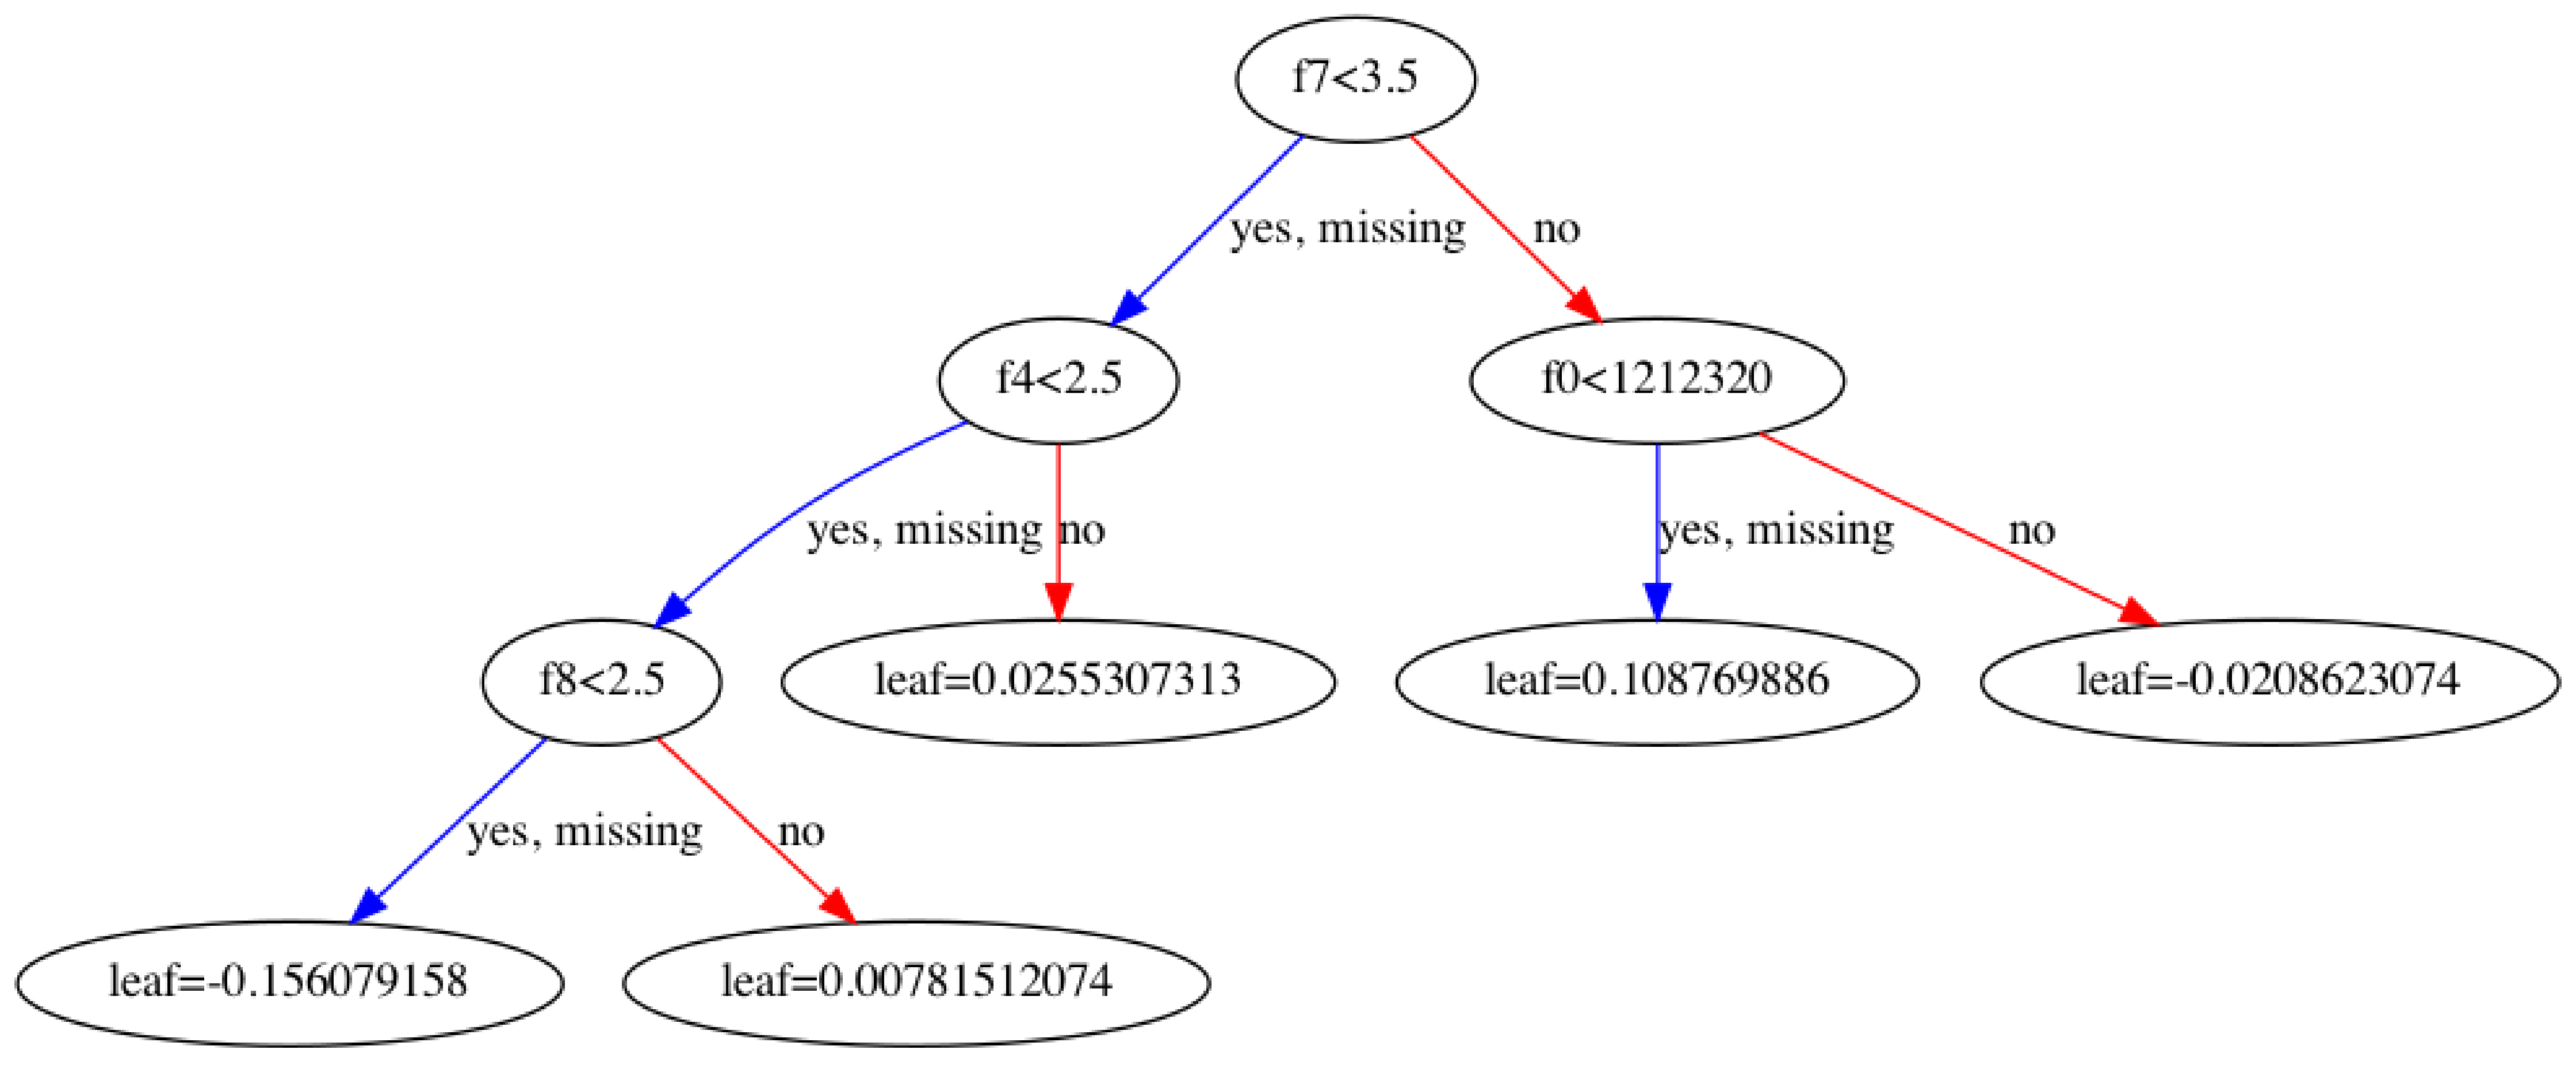

In [12]:
from matplotlib.pylab import rcParams

display_details()

rcParams['figure.figsize'] = (80,50)

xgboost.plot_tree(model, num_trees=25)